# 1). Predictive analysis using Support Vector Machine to predict diagnosis of fine needle aspiration (FNA) samples

## Introduction

Breast cancer is considered one of the common cancers in women associated with a multitude of factors including lifestyle, social and economics. An unregulated growth of cells in the breast tissue or a tumor is frequently observed. A tumor may be benign or malignant. Diagnostic tests includes magnetic resonance imaging (MRI), ultrasound, biopsy and breast fine-needle aspiration.

## Objective

The Diagnostic Wisconsin Breast Cancer Database contains data on FNA samples. Specifically, the database contains data on various features of the cell nucleus taken from patients and their associated diagnosis. In this project, we will attempt to predict the diagnosis using features available in the The Diagnostic Wisconsin Breast Cancer Database.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset

df = pd.read_csv(r"C:\Users\Dell\Documents\DSProjects\BreastCancer\breastcancer\breast-cancer.csv")

In [3]:
#explore 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#check length of rows and columns (rows,columns)
df.shape

(569, 32)

ID column is a bit redundant and unlikely to be useful. Let's save a dataframe containing id, then drop the id column and save it as a second version

In [5]:
#save to a file path called data_clean_id.csv
df.to_csv(r"C:\Users\Dell\Documents\DSProjects\BreastCancer\data_clean_id.csv")

In [6]:
#Drop the id column
df.drop('id', axis = 1, inplace =True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [8]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
#check for null values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
#check diagnosis data, is it all M and B? any other
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


unique() -> this function returns an array of unique values. The output suggests the data only has M or B

Now data frame is ready for some processing. Let's save this file for more analysis/backup

In [12]:
#Save this cleaned data into a file
df.to_csv(r"C:\Users\Dell\Documents\DSProjects\BreastCancer\data_veryclean_nonid.csv")

# 2. Exploratory Data Analysis

In [13]:
#descriptive statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
#Number of bengigns and malignant
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

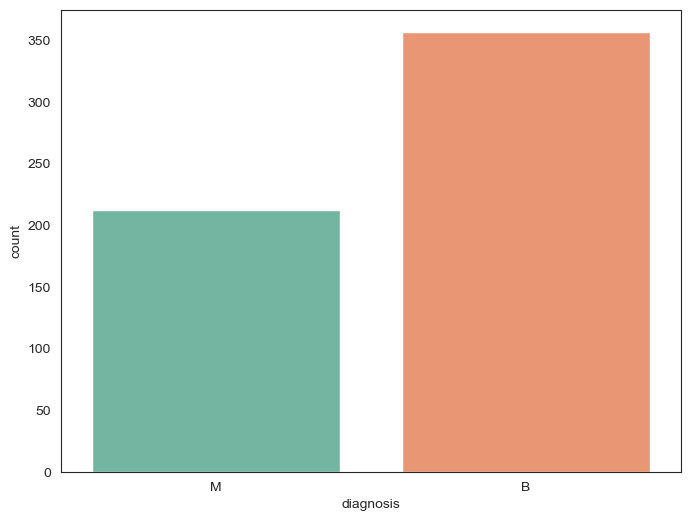

In [15]:
#visualise frequency of diagnosis column categories. Diagnosis will be the target variable
sns.set_style("white")
sns.set_context({"figure.figsize": (8, 6)})
sns.countplot(x=df['diagnosis'], label='Count', palette ='Set2')

In [16]:
#encoding the categorical data 
from sklearn.preprocessing import LabelEncoder
le_Y = LabelEncoder()
#transform the categorical data into numeric in diagnosis column. 1= malignant, 0 =benign
df.iloc[:,0] = le_Y.fit_transform(df.iloc[:,0].values)
df.iloc[:,0].values

C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2008308392.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0] = le_Y.fit_transform(df.iloc[:,0].values)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

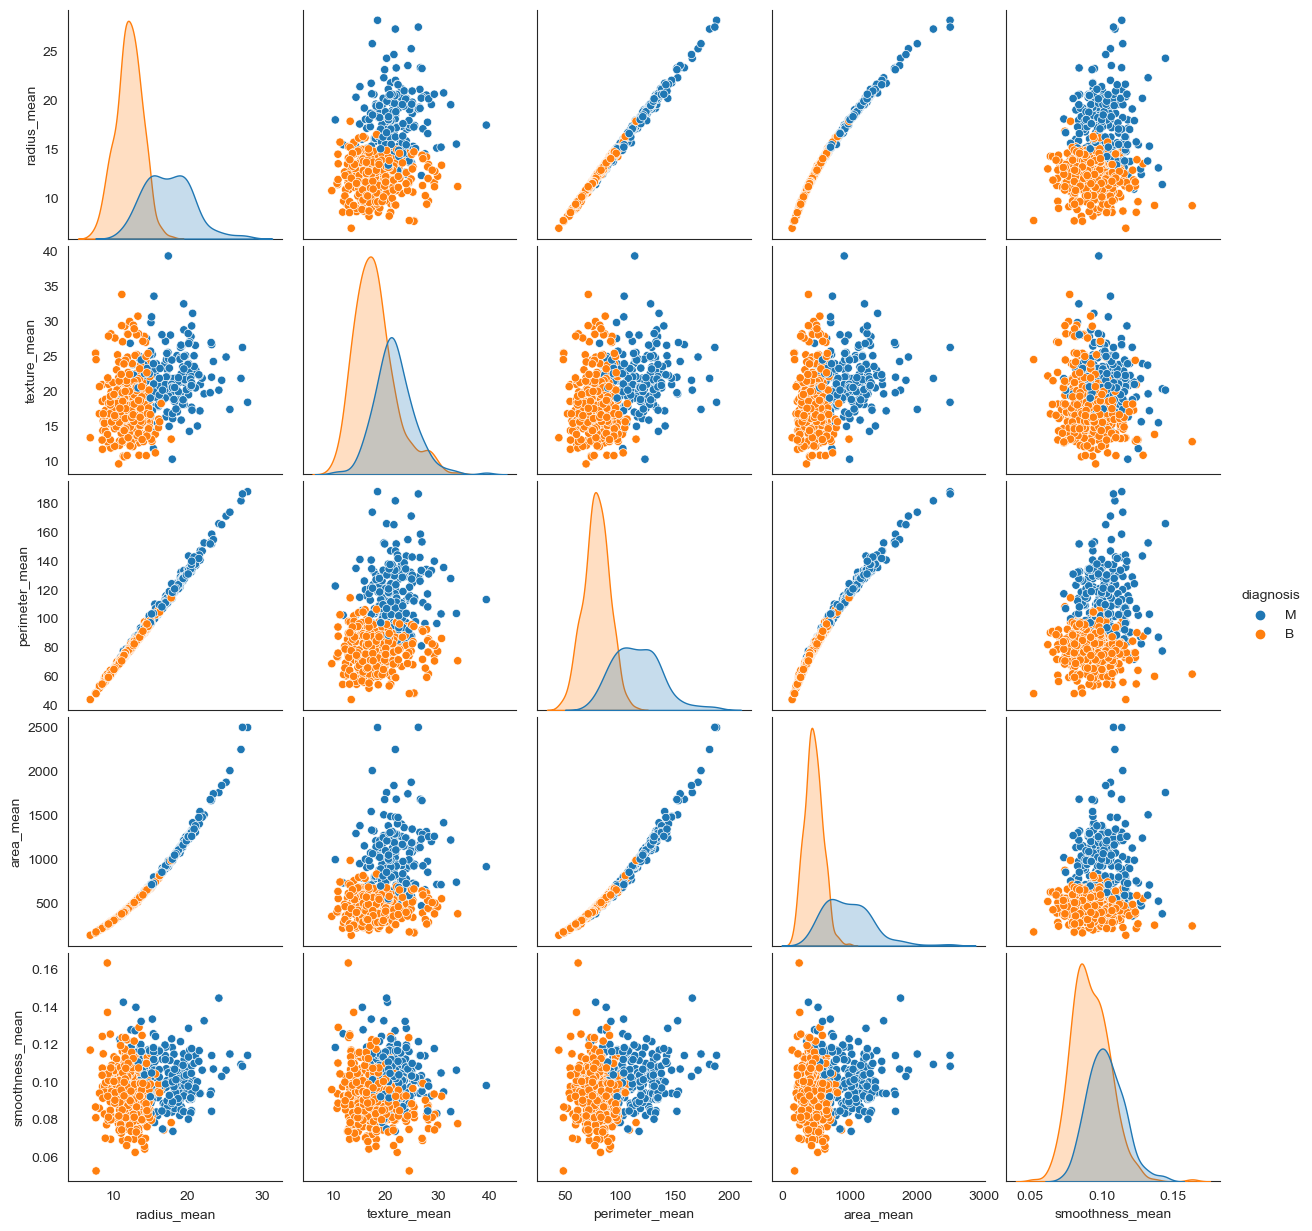

In [17]:
df2 = pd.read_csv(r"C:\Users\Dell\Documents\DSProjects\BreastCancer\data_veryclean_nonid.csv", index_col=False)
g = sns.pairplot(df2[[df2.columns[1],df2.columns[2], df2.columns[3],
                     df2.columns[4], df2.columns[5], df2.columns[6]]], hue='diagnosis')


Variables which increases when malignant
* Radius_mean
* Perimeter_mean

In [18]:
df2 = pd.read_csv(r"C:\Users\Dell\Documents\DSProjects\BreastCancer\data_veryclean_nonid.csv", index_col=False)
df2.drop('Unnamed: 0',axis=1, inplace=True) #drops the unamed variable from dropping one row in the original df

df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


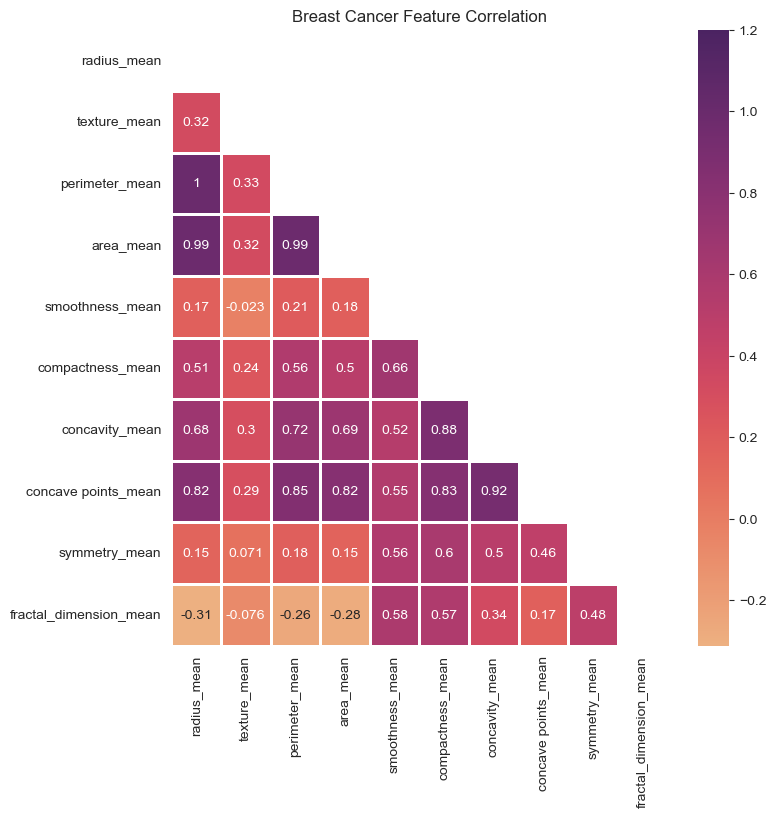

In [19]:
# Compute the correlation matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(df2.iloc[:,1:11].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.color_palette('flare', as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df2.iloc[:,1:11].corr(), vmax=1.2, cmap=cmap, mask=mask, ax=ax,
            annot=True, linewidths=2)
plt.show()

Observations:
* Strong positive relationship between area_mean and radius_mean and perimeter_mean
* R above 0.8 : concavity_mean-compactness_mean; concave_mean-radius_mean, perimeter_mean,area_mean,compactnes_means,concavity_mean
* Moderate negative relationship between:fractal dimension - radius, texture, perimeter and area


# 3). Data Preprocessing

In [20]:
#Assign predictors to an array

X = df2.iloc[:,1:31].values #array of the predictors
y= df.iloc[:,0].values #array of the target variables in 1 or 0s
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [21]:
#Splitting data into test and validating data 75/25
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.25, random_state=8)
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((426, 30), (426,), (143, 30), (143,))

In [22]:
#Standardization of features
from sklearn.preprocessing import StandardScaler

#Normalise data
sc = StandardScaler()
Xs = sc.fit_transform(X)

In [23]:
#Dimensionality Reduction with PCA
from sklearn.decomposition import PCA
pca =PCA(n_components = 10) #Keep top 10 components
fit = pca.fit(Xs)

#summarise components
print("Explained Variance: %s" %fit.explained_variance_ratio_) #variance of each principle components
print(fit.components_) #print out each components 

Explained Variance: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.998

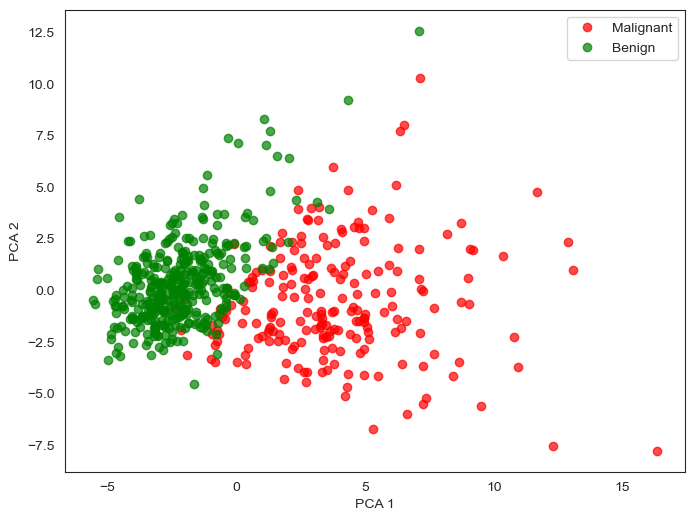

In [24]:
#PCA plot

X_pca = pca.transform(Xs)
PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0] #takes the PC1
PCA_df['PCA_2'] = X_pca[:,1] #takes PC2

plt.plot(PCA_df['PCA_1'][df2.diagnosis =='M'], PCA_df['PCA_2'][df2.diagnosis =='M'], 'o', alpha =0.7, color ='r')
plt.plot(PCA_df['PCA_1'][df2.diagnosis =='B'], PCA_df['PCA_2'][df2.diagnosis =='B'], 'o', alpha =0.7, color ='g')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(['Malignant', 'Benign'])
plt.show()

In [25]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

[44.27 63.24 72.63 79.23 84.73 88.75 91.   92.59 93.98 95.15]


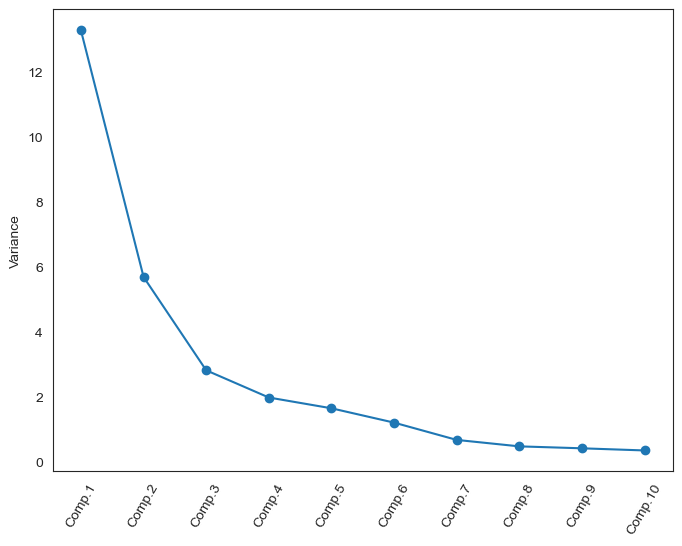

In [26]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, Xs)

The most obvious change in slope in the scree plot occurs at component 3, which is the "elbow" of the scree plot. Therefore, the first three components should be retained.

# 4. Modelling with Support Vector Machine (SVM) 

## Why SVM?
* According to literature, seems to be a very high performing algorithm for two-way classifcation problems.

## Important parameters
* Regularization parameter C
* The choice of the kernel
* Kernel-specific paremeters


In [27]:
#load ML packages
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

In [28]:
df3 = pd.read_csv(r"C:\Users\Dell\Documents\DSProjects\BreastCancer\data_veryclean_nonid.csv", index_col=False)
df3.drop('Unnamed: 0',axis=1, inplace=True) 
df3.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
X = df3.iloc[:,1:31].values #array of the predictors
y= df.iloc[:,0].values #array of the target variables in 1 or 0s

#Normalise the data
Xs = sc.fit_transform(X)

#split train and test
train_X, test_X, train_y, test_y = train_test_split(Xs, y, test_size =0.25)

In [30]:
#SVM classifier and train it on train data set
svcl = SVC(probability = True)
svcl.fit(train_X, train_y)

#Get accuracy score of classifier
classifier_score = svcl.score(test_X, test_y)
print('Classifier accuracy score = {:.2f}'.format(classifier_score))

Classifier accuracy score = 0.97


In [31]:
#4-fold Cross validation score using classifier 
folds = 4
cv_error = np.average(cross_val_score(SVC(), Xs, y, cv=folds))
print ('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(folds, cv_error))

The 4-fold cross-validation accuracy score for this classifier is 0.97


In [32]:
#feature selection
from sklearn.feature_selection import SelectKBest, f_regression
svcl_f = make_pipeline(SelectKBest(f_regression, k =3), SVC(probability = True))

scores = cross_val_score(svcl_f, Xs, y, cv=4) 
print(scores)

avg = (np.mean(scores), np.std(scores)/np.sqrt(scores.shape[0]))
print('Average cross validation score and standard deviation for three feature selection:(%.2f +/- %.3f)'%avg)

[0.93706294 0.95070423 0.96478873 0.95070423]
Average cross validation score and standard deviation for three feature selection:(0.95 +/- 0.005)


3 feature model has comparable accuracy score to full feature model. What features did it select?

In [33]:
#train model in pipeline
svcl_f.fit(train_X, train_y)

#3 best features selected by selectkbest
x = svcl_f.named_steps['selectkbest']

#using all features array to report the three features that was picked by selectkbest
print(df3.columns.values[1:][x.get_support()])

['radius_worst' 'perimeter_worst' 'concave points_worst']


* 3 features produce similar accuracy for the classifier to full features
* We use just the three features from now on

## Assessing model accuracy with ROC curve and confusion matrix

### Plotting a Confusion Matrix

In [34]:
#Confusion matrix
y_pred =svcl_f.predict(test_X)
cm = metrics.confusion_matrix(test_y, y_pred)
print(cm)

[[82  0]
 [ 7 54]]


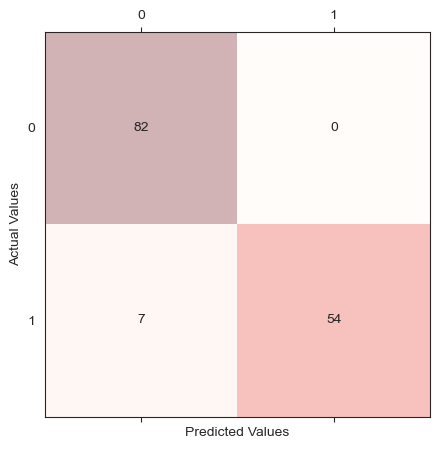

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        82
           1       1.00      0.89      0.94        61

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [35]:
#since already fit the classifier to a training data once, do I still need to do it again?
from IPython.display import Image, display

fig, ax = plt.subplots(figsize = (5,5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(test_y, y_pred ))

* The classifier made a total of 143 predictions 
* Classifier predicted with correctly to the true values 93% of the time
* 10 misclassifications with a 6.9% error rate (10/143)

### Comparing ROC curves 

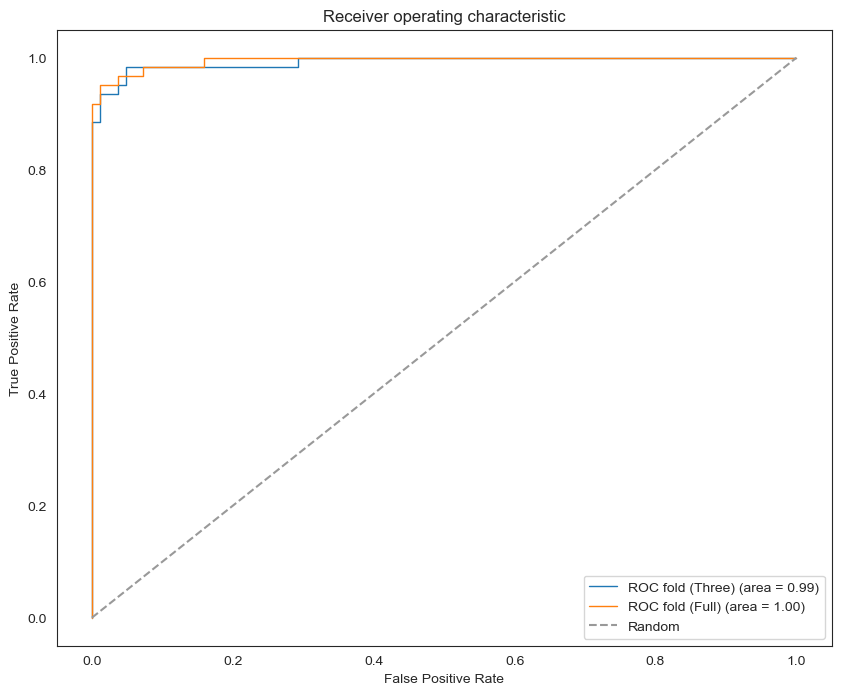

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ = svcl_f.predict_proba(test_X)
fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (Three) (area = %0.2f)' % (roc_auc))

#Compare with ROC of model with all features
probas_ = svcl.fit(train_X,train_y).predict_proba(test_X)
fpr_2, tpr_2, thresholds_new = roc_curve(test_y, probas_[:, 1])
roc_auc_2 = auc(fpr_2, tpr_2)
plt.plot(fpr_2, tpr_2, lw=1, label='ROC fold (Full) (area = %0.2f)' % (roc_auc_2))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')

plt.show()

## 5). Optimizing the SVM Classifier

### Load packages and data

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

## Supervised learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_regression

# visualization
import seaborn as sns 


In [38]:
#Load data
df = pd.read_csv(r"C:\Users\Dell\Documents\DSProjects\BreastCancer\data_veryclean_nonid.csv", index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True) 
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



The classifier accuracy score is 0.97

The 5-fold cross-validation accuracy score for this classifier is 0.98
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        86
           1       0.98      0.93      0.95        57

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



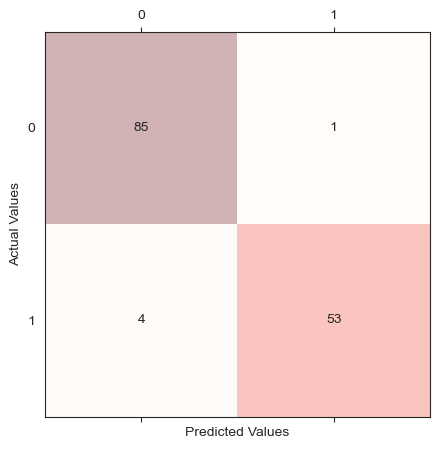

In [39]:
X = df.iloc[:,1:31].values #array of the predictors
y= df.iloc[:,0].values #array of the target variables 

#transform target variables to 1 and 0s
le_Y = LabelEncoder()
y = le_Y.fit_transform(y)

#Normalise the data
sc = StandardScaler()
Xs = sc.fit_transform(X)

#dimenionsality reduction
pca =PCA(n_components=10)
fit=pca.fit(Xs)
X_pca = pca.transform(Xs)

#split train and test
train_X, test_X, train_y, test_y = train_test_split(X_pca, y, test_size =0.25)

#Call classifier
svcl = SVC(probability = True)
svcl.fit(train_X, train_y)

#Accuracy prediction on 25% of test sample
classif_score = svcl.score(test_X, test_y)
print('\nThe classifier accuracy score is {:03.2f}\n'.format(classif_score))

# 5-fold cross-validation score using an SVC estimator.
folds = 5
cv_error = np.average(cross_val_score(SVC(), X_pca, y, cv=folds))
print ('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(folds, cv_error))

y_pred = svcl.fit(train_X, train_y).predict(test_X)
cm = metrics.confusion_matrix(test_y, y_pred)

print(classification_report(test_y, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

We will tune two parameters of the SVM model:
* C(How much to relax the margin)
* Type of kernel

Default of the SVM uses Radial Basis Function kernel with a C value of 1.0. We will perform a grid search using 10 fold cross validation with a standardized copy fo the training dataset. 

In [40]:
#Training classifiers
kernels_val = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
para_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel':kernels_val}

#gridsearch hyperparameters over 5 cross validations
gs =GridSearchCV(SVC(), param_grid=para_grid, cv=5)

#training model with gridsearch
gs.fit(train_X, train_y)

print("\nThe best parameters are %s with a score of %0.2f\n"
      % (gs.best_params_, gs.best_score_))



The best parameters are {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} with a score of 0.98



              precision    recall  f1-score   support

           0       0.93      0.99      0.96        86
           1       0.98      0.89      0.94        57

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



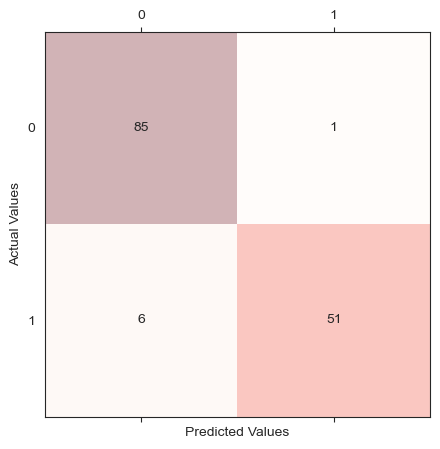

In [41]:
gs.best_estimator_.probability =True
svcl = gs.best_estimator_

y_pred = svcl.fit(train_X, train_y).predict(test_X)
cm = metrics.confusion_matrix(test_y, y_pred)

print(classification_report(test_y, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

## Decision boundaries of different classifiers
Check boundaries produced by linear, gaussian and polynomial classifiers

In [42]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets

def decision_plot(train_X, train_y, n_neighbors, weights):
       h = .02  # step size in the mesh

Xtrain2 = train_X[:, :2] # we only take the first two features.


# Create color maps

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])



# we create an instance of SVM and fit out data. 
# We do not scale ourdata since we want to plot the support vectors


C = 1.0  # SVM regularization parameter

svm = SVC(kernel='linear', random_state=0, gamma=0.1, C=C).fit(Xtrain2, train_y)
rbf_svm = SVC(kernel='rbf', gamma=0.7, C=C).fit(Xtrain2, train_y)
poly_svm = SVC(kernel='poly', degree=3, C=C).fit(Xtrain2, train_y)

In [43]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'
    
    # create a mesh to plot in
x_min, x_max = Xtrain2[:, 0].min() - 1, Xtrain2[:, 0].max() + 1
y_min, y_max = Xtrain2[:, 1].min() - 1, Xtrain2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

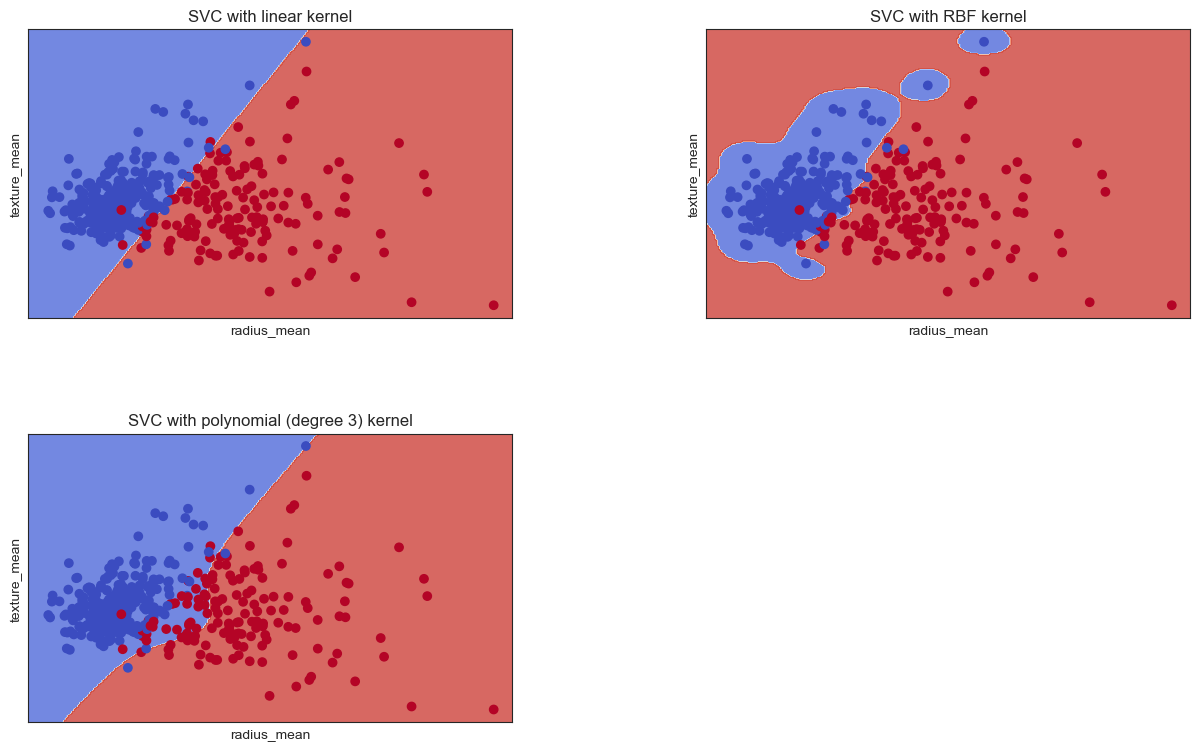

In [44]:
for i, svcl in enumerate((svm, rbf_svm, poly_svm)):
    # Plot the decision boundary. Assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = svcl.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xtrain2[:, 0], Xtrain2[:, 1], c=train_y, cmap=plt.cm.coolwarm)
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

# 6). Compare with other classification methods


In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a pipeline that standardizes the data then creates a model
#Load libraries for data processing
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# visualization
import seaborn as sns 

In [46]:
df = pd.read_csv(r"C:\Users\Dell\Documents\DSProjects\BreastCancer\data_veryclean_nonid.csv", index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True) 

#Load and pre-process data

X = df.iloc[:,1:31].values #array of the predictors
y = df.iloc[:,0].values #array of the target variables 

#transform target variables to 1 and 0s
le_Y = LabelEncoder()
y = le_Y.fit_transform(y)

#Normalise the data
sc = StandardScaler()
Xs = sc.fit_transform(X)

#split train and test
train_X, test_X, train_y, test_y = train_test_split(Xs, y, test_size =0.25)


In [47]:
pipelines = []
pipelines.append(('LR',Pipeline([('LR', LogisticRegression())])))
pipelines.append(('LDA', Pipeline([('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('KNN', KNeighborsClassifier())])))
pipelines.append(('CART', Pipeline([('CART', DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline([('NB', GaussianNB())])))
pipelines.append(('SVM', Pipeline([('SVM', SVC())])))

# Test options and evaluation metric
num_folds = 10
num_instances = len(train_X)
seed = 7 
scoring = 'accuracy'
results =[]
names =[]

for name, model in pipelines:  
    k_fold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, train_X, train_y, cv=k_fold,
      scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.971872 (0.022857)
LDA: 0.955592 (0.035136)
KNN: 0.960244 (0.038959)
CART: 0.910963 (0.056976)
NB: 0.934496 (0.039801)
SVM: 0.967165 (0.028096)


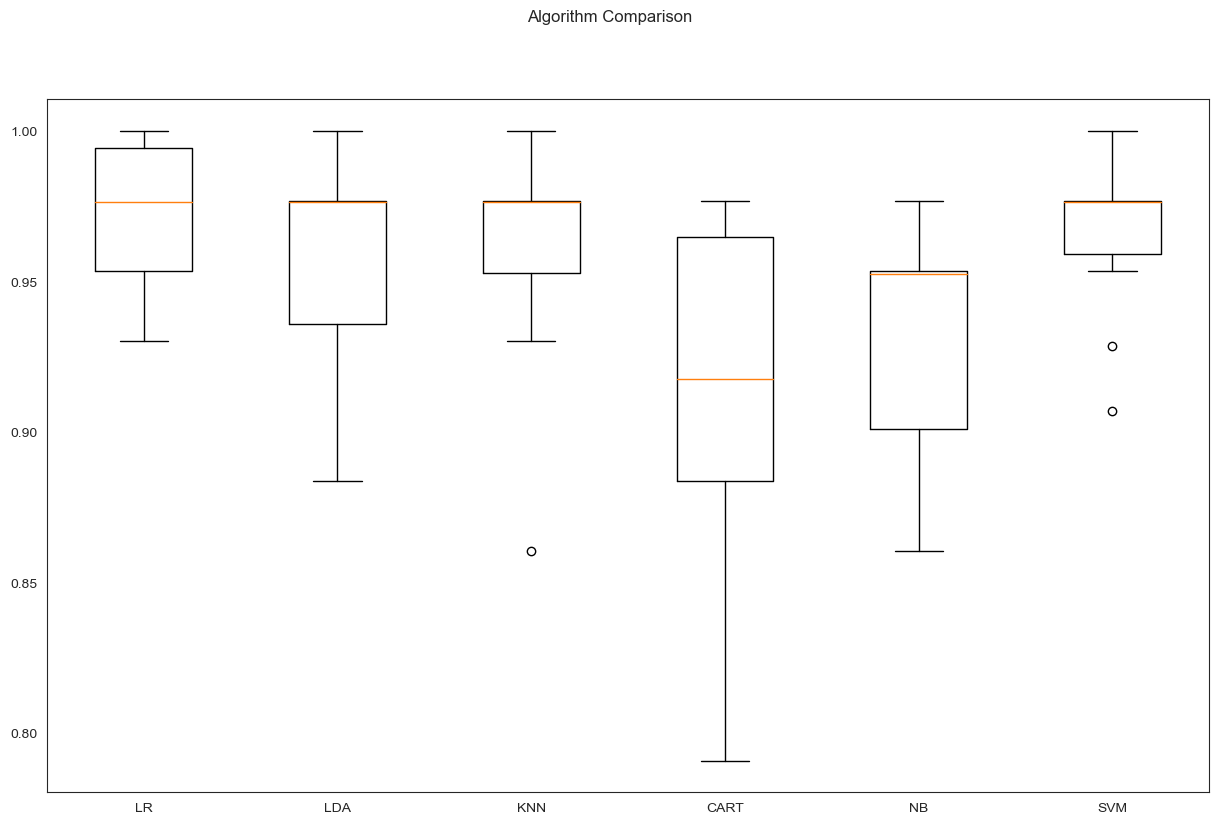

In [48]:
#Boxplot of algorithms

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* Results show that SVM, LR and KNN algorithms are the top three. More tuning of each model might result in more accurate models

## Testing Optimization in each model

### Tuning SVM hyperparameters

In [49]:
#Support Vector Classifier Pipeline
pipe_svc = Pipeline([('pca', PCA(n_components=2)),
                     ('svcl', SVC(probability=True, verbose=False))])

#Train pipeline with training data
pipe_svc.fit(train_X, train_y)

scores = cross_val_score(estimator=pipe_svc, X=train_X, y=train_y, cv=10, n_jobs=1, verbose=0)
print('➔ Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svcl__C': param_range,'svcl__kernel': ['linear']},
              {'svcl__C': param_range,'svcl__gamma': param_range,
               'svcl__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=1)
gs = gs.fit(train_X, train_y)
print('➔ Tuned Parameters Best Score: ',gs.best_score_)
print('➔ Best Parameters: \n',gs.best_params_)

➔ Model Training Accuracy: 0.932 +/- 0.040
➔ Tuned Parameters Best Score:  0.9412513842746402
➔ Best Parameters: 
 {'svcl__C': 1000.0, 'svcl__gamma': 0.001, 'svcl__kernel': 'rbf'}


### Tuning k-NN hypeparameters

* Number of neighbors k
* The distance metric/similarity function

In [50]:
from sklearn.neighbors import KNeighborsClassifier as KNN

pipe_knn = Pipeline([('pca', PCA(n_components=2)),
                     ('knncl', KNeighborsClassifier())])
            

pipe_knn.fit(train_X, train_y) 

scores = cross_val_score(estimator=pipe_knn, 
                         X=train_X, 
                         y=train_y, 
                         cv=10,
                         n_jobs=1)
print('➝ Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = range(1, 31)
param_grid = [{'knncl__n_neighbors': param_range}]
# instantiate the grid
gs = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=10, 
                    scoring='accuracy')
gs = gs.fit(train_X, train_y)
print('➔ Tuned Parameters Best Score: ',gs.best_score_)
print('➔ Best Parameters: \n',gs.best_params_)

➝ Model Training Accuracy: 0.918 +/- 0.049
➔ Tuned Parameters Best Score:  0.9320598006644518
➔ Best Parameters: 
 {'knncl__n_neighbors': 26}


### Final Model

In [51]:
svc_final = gs.best_estimator_

svc_final.fit(train_X, train_y)
scores = cross_val_score(estimator=svc_final,
                         X=train_X,
                         y=train_y,
                         cv=10,
                         n_jobs=1)

print('➔ Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('➜ Final Accuracy on Test set: %.5f' % svc_final.score(test_X, test_y))

➔ Final Model Training Accuracy: 0.932 +/- 0.037
➜ Final Accuracy on Test set: 0.95105


0.951048951048951
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        84
           1       0.96      0.92      0.94        59

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



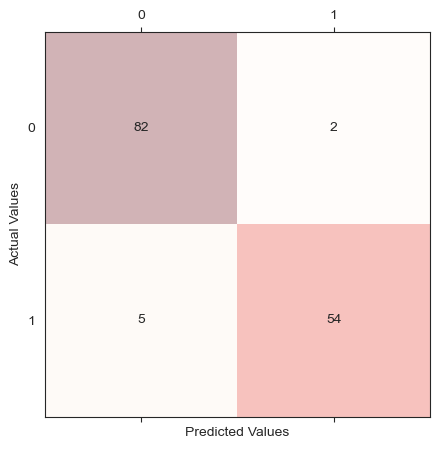

In [52]:
svc_final.fit(train_X, train_y)
y_pred = svc_final.predict(test_X)

print(accuracy_score(test_y, y_pred))
print(classification_report(test_y, y_pred ))

cm = metrics.confusion_matrix(test_y, y_pred)


fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

## Conclusions

Built a SVM classifier as a predictive model for classifying malignant cells from FNA test features. The following steps were taken to achieve this:

1. Loadeed the Diagnostic Wisconsin Breast Cancer Database
2. Pre-processed data for analysis
3. Exploratory data analysis using heatmaps and pairplot to identify correlated features
4. Dimensionality reduction with PCA plot and scree plot
5. Built SVM classifier and evaluate using confusion matrix and ROC curves. Compared algorithm with feature selections to full feature algorithm
6. Compared SVM to five other algorithms. Optimized the top 2 algorithms 
7. Finalise the model using optimised parameters and built a classifier with a 0.96-0.97 accuracy
